# Android App Rating prediction

 This dataset is about the information of 10000+ App in Android market.
 The columns of this dataset includes:App, Category, Rating, Reviews, Size, Installs, Type, Price, Content rating, Genres/
 App: Application Name
 Category: the App belongs to 
 rating: user rating of App
 Reviews: number of viewing App
 Size : the memeory used of App
 installs: number of installing App
 Type: Free or Paid
 price : price of App
 content rating: targeted group(adult/ under 18 age)
 Genres: (Music, famliy or event) and so on
 
 We can predict which App will get high rating via building prediction model. In this project, we set several variable including dummy variable in order to build stable model. 

#### Import neccessary libraries for the project.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import os
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from patsy import dmatrices
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Read csv file and remove null value

In [2]:
data = pd.read_csv("~/Desktop/googleplaystore.csv")
data.dropna(inplace= True)
data.info()
data.head()
data[data.App != 'Life Made WI-Fi Touchscreen Photo Frame']
data.drop(columns = ['Last Updated','Current Ver','App', 'Android Ver'],inplace = True)
data.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design
6,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design
7,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design
8,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design
9,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity


### Plot graph with different dimension

                       Rating
Category                     
ART_AND_DESIGN       4.377049
AUTO_AND_VEHICLES    4.190411
BEAUTY               4.278571
BOOKS_AND_REFERENCE  4.346067
BUSINESS             4.121452
COMICS               4.155172
COMMUNICATION        4.158537
DATING               3.970769
EDUCATION            4.389032
ENTERTAINMENT        4.126174
EVENTS               4.435556
FAMILY               4.192383
FINANCE              4.131889
FOOD_AND_DRINK       4.166972
GAME                 4.286326
HEALTH_AND_FITNESS   4.277104
HOUSE_AND_HOME       4.197368
LIBRARIES_AND_DEMO   4.179688
LIFESTYLE            4.094904
MAPS_AND_NAVIGATION  4.051613
MEDICAL              4.189143
NEWS_AND_MAGAZINES   4.132189
PARENTING            4.300000
PERSONALIZATION      4.335256
PHOTOGRAPHY          4.192114
PRODUCTIVITY         4.211396
SHOPPING             4.259664
SOCIAL               4.255598
SPORTS               4.223511
TOOLS                4.047203
TRAVEL_AND_LOCAL     4.109292
VIDEO_PLAY

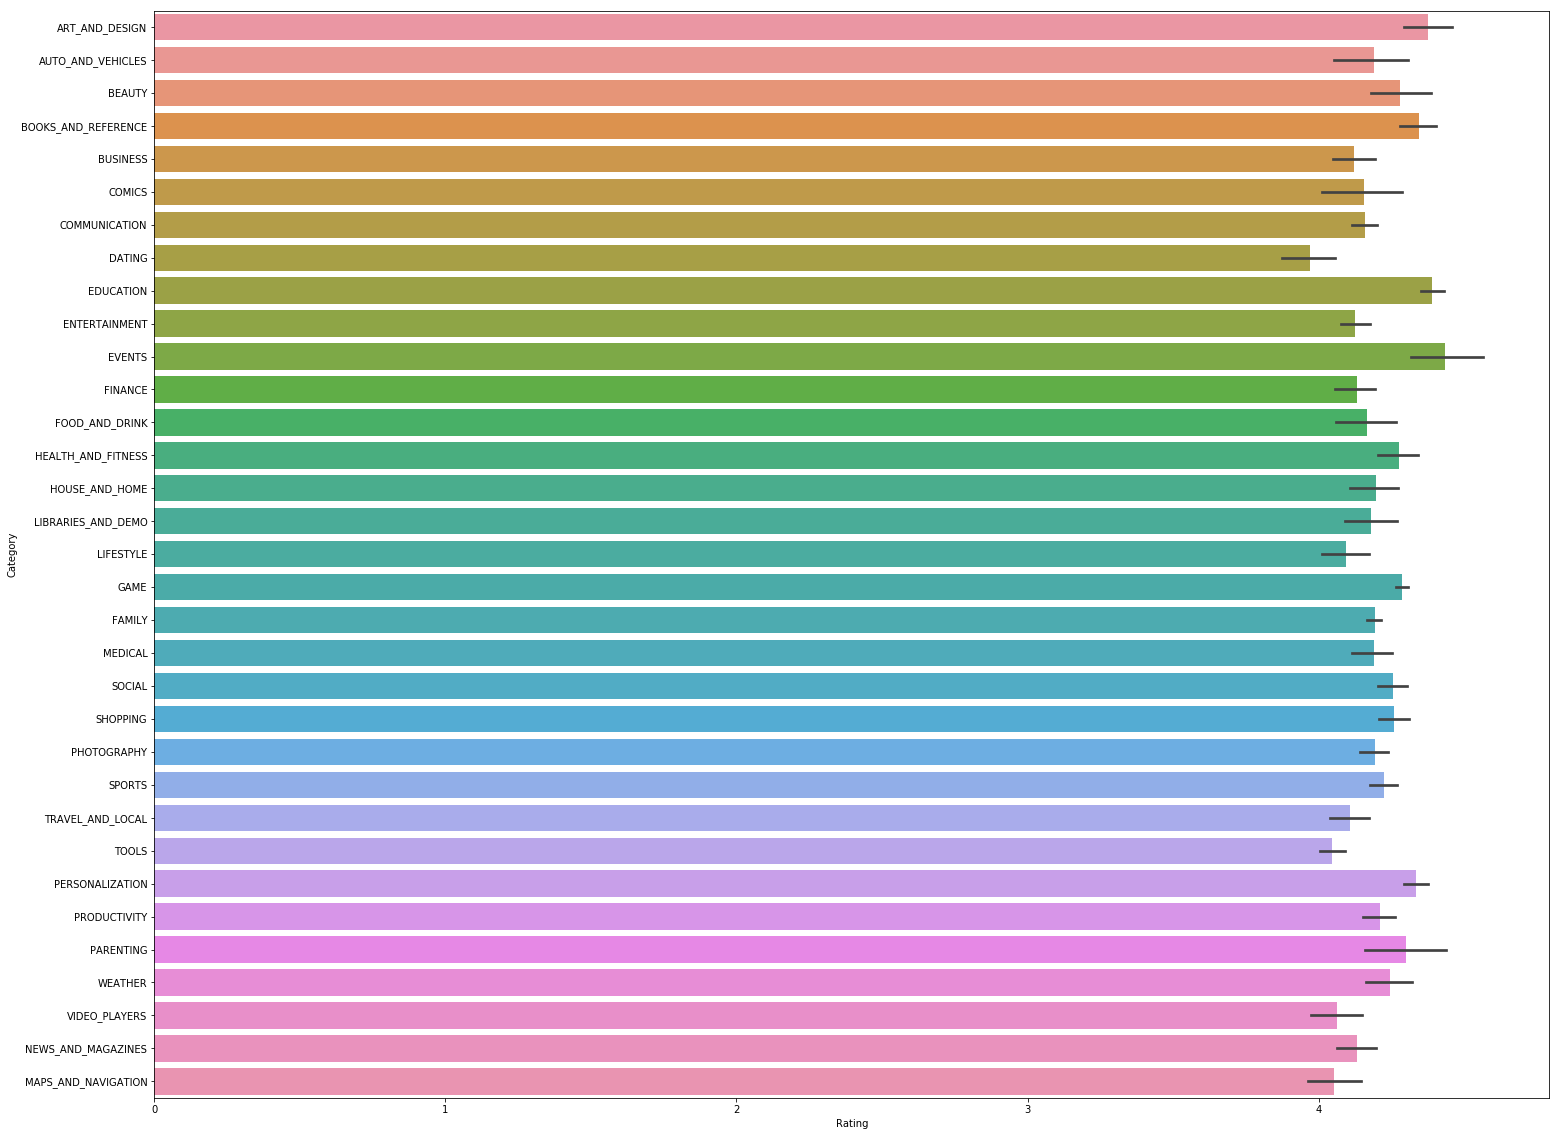

In [3]:
data2 = data.groupby('Category').mean()
print(data2)
data2 = pd.DataFrame(data = data2)
plt.figure(figsize=(25,20))
sns.barplot(y = 'Category', x = 'Rating', data = data, )

As can be seen from above chart, the Event App gets higher mean rating among those category, which means category is a significant factor influcing rating. So it makes sure that we can use it as dummy variable to measure and predict Rating of App.

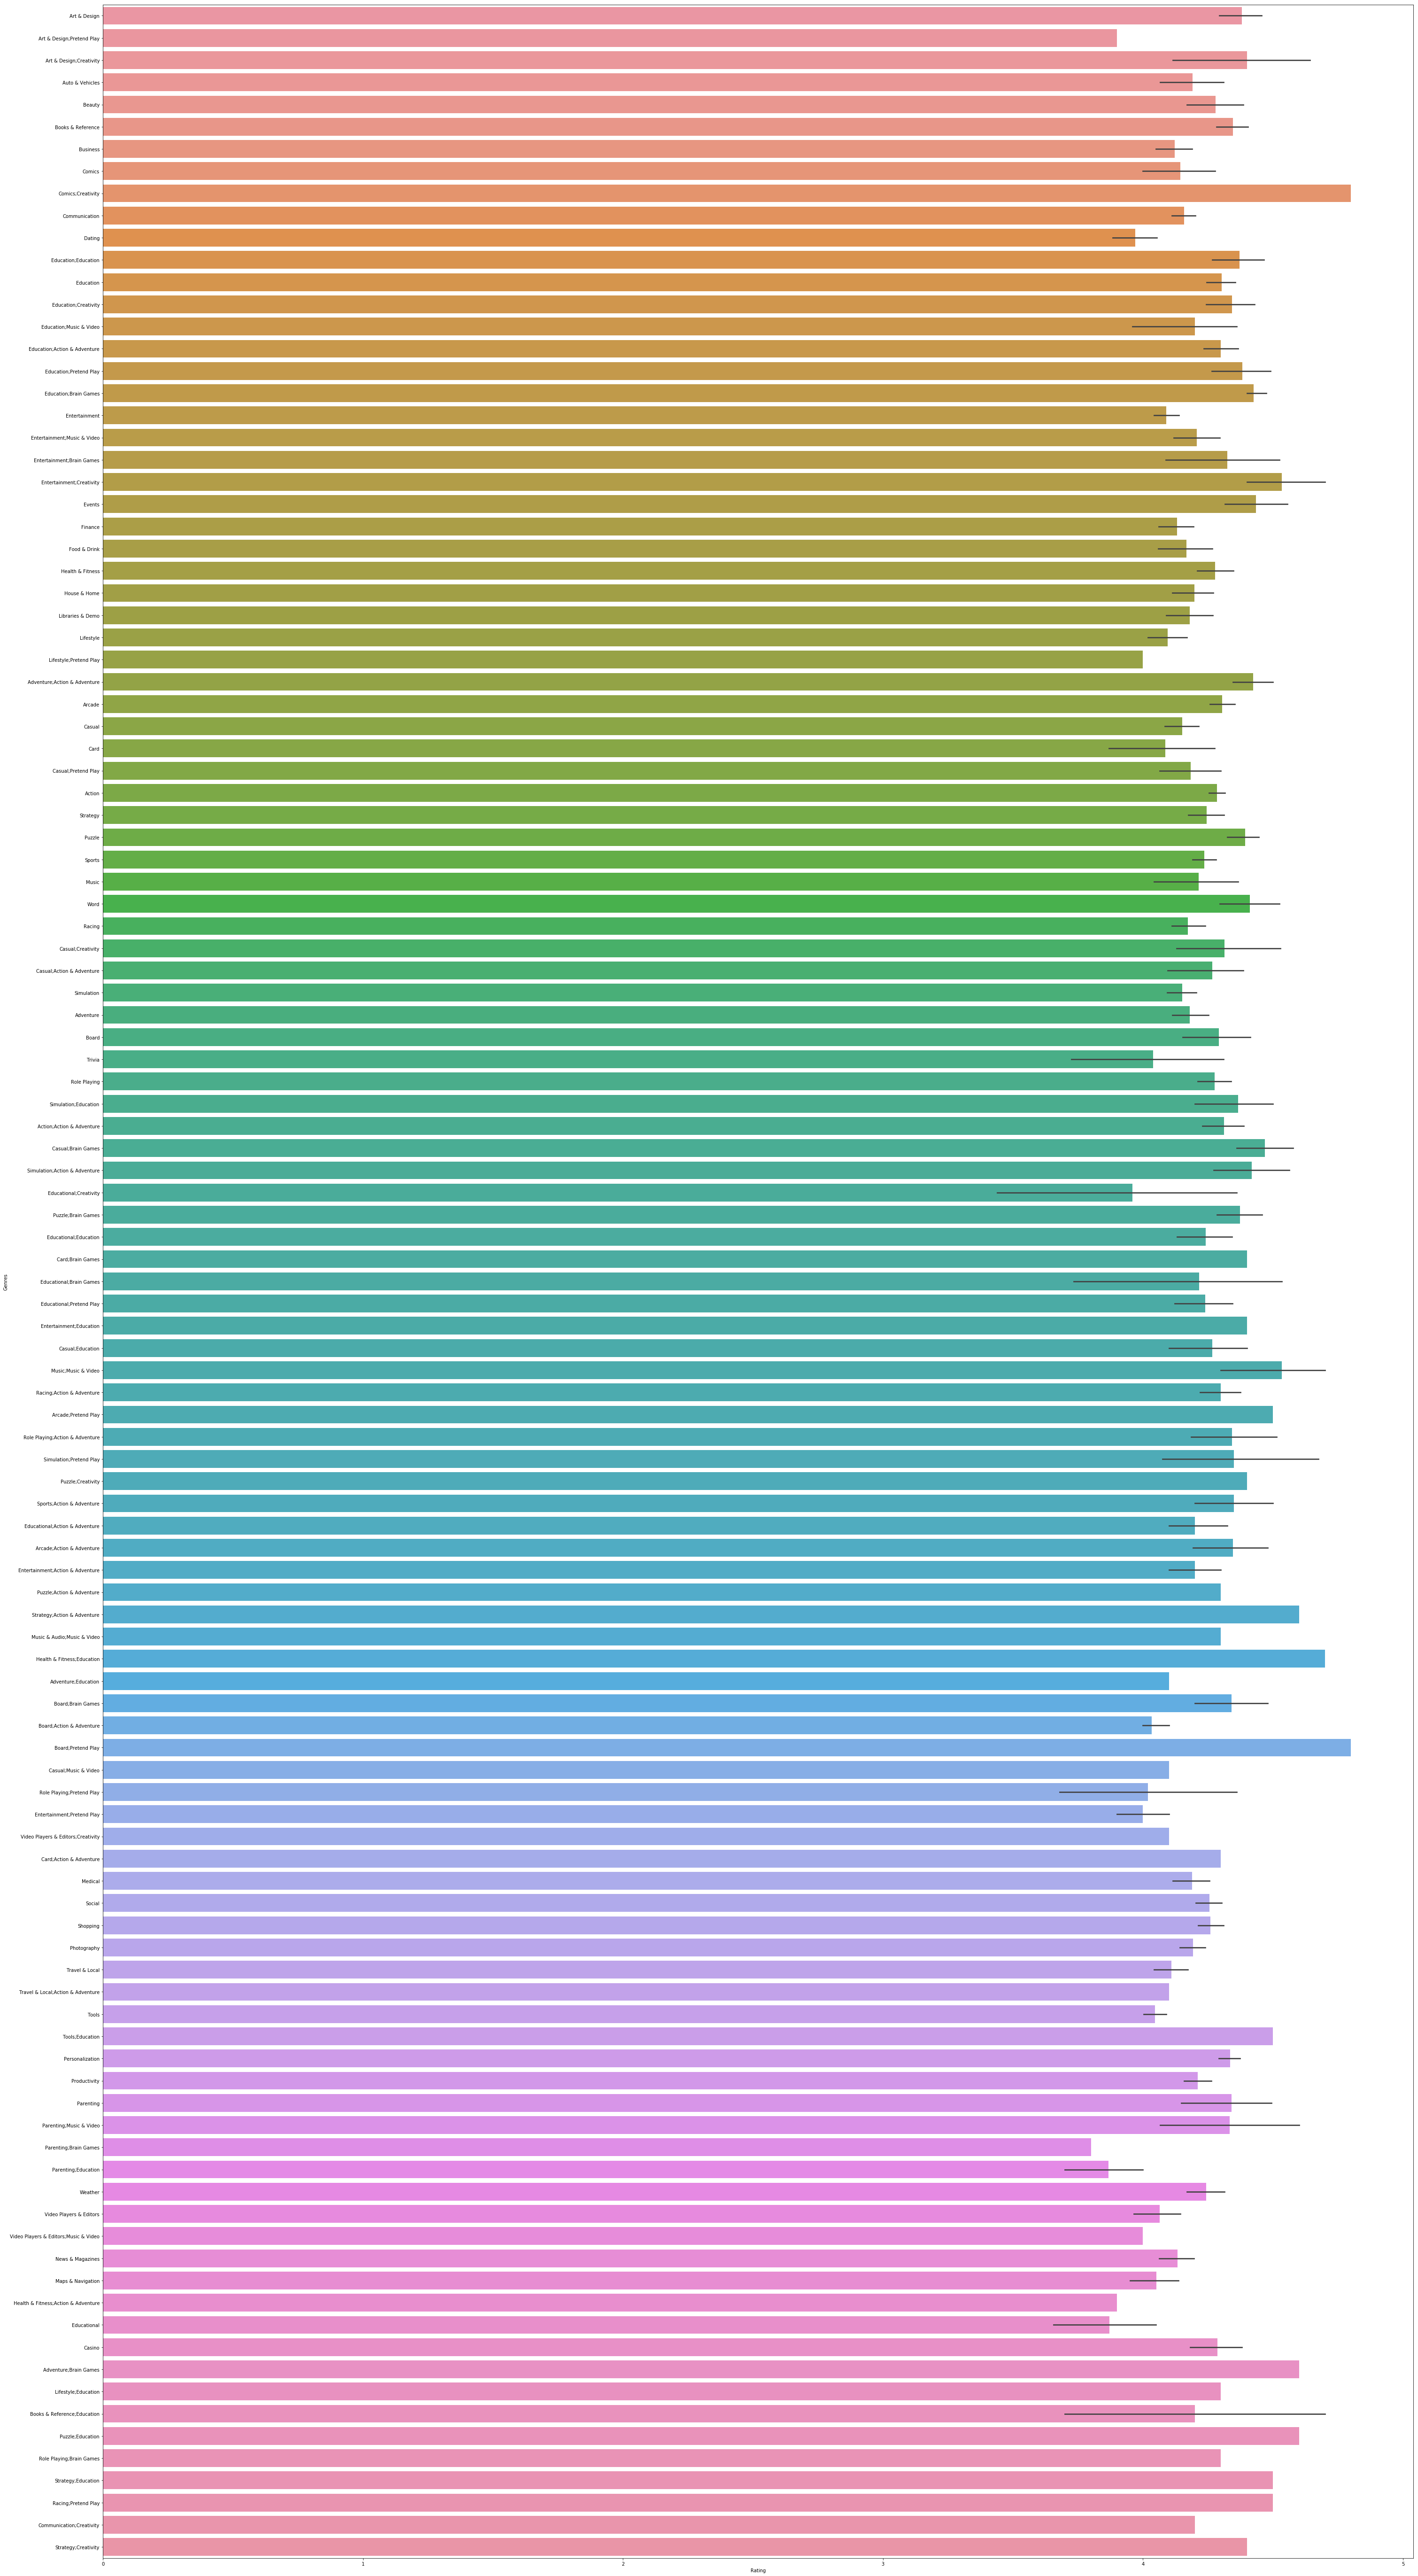

In [4]:
data3 = data[data['Rating'] > 4].groupby('Genres').count()
plt.figure(figsize=(50,100))
sns.barplot(x = 'Rating', y = 'Genres', data = data,)

Through building such as graph, it shows that Genres is another indenpendnt factors to predict rating of App.

[Text(0,0,'Free'), Text(0,0,'Paid')]

<Figure size 21600x14400 with 0 Axes>

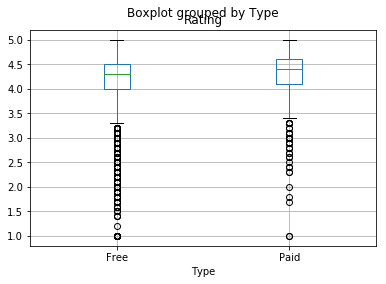

In [5]:
data4 = data.groupby('Type').mean()
plt.figure(figsize=(300,200))
data.boxplot(column = 'Rating',by ='Type')
plt.gca().set_xticklabels(['Free','Paid'])

By observing this graph, I found the mean of these two type(free and paid) are slight different. Although the amount of free App is much more than paid App, but the mean of paid App is higher than free App. So the Type is not crucial factor influcing rating.

### Cleaning the data 

###### convert category and type into integer 

In [6]:
category1 = data['Category'].unique()
category_count = len(category1)
category_dict = {}
for i  in range(0,category_count):
    category_dict[category1[i]] = i
data['Category_c'] = data['Category'].map(category_dict).astype(int)
def type1(type):
    if type == 'Free':
        return 0
    else:
        return 1
    
data['Type'] = data['Type'].map(type1)
data.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,0,Everyone,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,0,Everyone,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,0,Teen,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,0,Everyone,Art & Design;Creativity,0


####  convert data of Size column

In [7]:

def Size1(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return int(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return int(x)
    else:
        return 0

print(Size1('320k'))
print(Size1('1M'))
print(Size1('Varies with device'))
# data['Size'] = data['Size'].map(Size1)


data['Size'] = data['Size'].apply(lambda x : Size1(x))

320000
1000000
0


In [8]:
data.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c
0,ART_AND_DESIGN,4.1,159,19000000,"10,000+",0,0,Everyone,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14000000,"500,000+",0,0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",0,0,Everyone,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",0,0,Teen,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2800000,"100,000+",0,0,Everyone,Art & Design;Creativity,0


#### also convert content rating to int

In [9]:

content1 =data['Content Rating'].unique()
content2 = len(content1)
content3 = {}
for i in range(0,content2):
    content3[content1[i]]=i
data['Content Rating'] = data['Content Rating'].map(content3)

#### convert Genres into int

In [10]:

Genre1 = data.Genres.unique()
Genre_dict ={}
for i in range(len(Genre1)):
    Genre_dict[Genre1[i]] = i
data['Genre2'] = data['Genres'].map(Genre_dict).astype(int)


#### convert installs column

In [11]:

data['Installs'] = data['Installs'].apply(lambda x: x.replace(',',''))
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+',''))

In [12]:
data.head(20)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genre2
0,ART_AND_DESIGN,4.1,159,19000000,10000,0,0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000,500000,0,0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000,5000000,0,0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000,50000000,0,0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000,100000,0,0,0,Art & Design;Creativity,0,2
5,ART_AND_DESIGN,4.4,167,5600000,50000,0,0,0,Art & Design,0,0
6,ART_AND_DESIGN,3.8,178,19000000,50000,0,0,0,Art & Design,0,0
7,ART_AND_DESIGN,4.1,36815,29000000,1000000,0,0,0,Art & Design,0,0
8,ART_AND_DESIGN,4.4,13791,33000000,1000000,0,0,0,Art & Design,0,0
9,ART_AND_DESIGN,4.7,121,3100000,10000,0,0,0,Art & Design;Creativity,0,2


In [13]:

data['Price'] = data['Price'].apply(lambda x: x.replace('$',''))
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genre2
0,ART_AND_DESIGN,4.1,159,19000000,10000,0,0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000,500000,0,0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000,5000000,0,0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000,50000000,0,0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000,100000,0,0,0,Art & Design;Creativity,0,2


In [14]:
data['Reviews'] = data['Reviews'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null int64
Installs          9360 non-null object
Type              9360 non-null int64
Price             9360 non-null object
Content Rating    9360 non-null int64
Genres            9360 non-null object
Category_c        9360 non-null int64
Genre2            9360 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 1.2+ MB


check if the value is matched and make sure the data type is ok. So we can do next step to build model to predict.

In [15]:
data2 = data.groupby('Type').sum()
print(data2)

       Rating     Reviews          Size  Content Rating  Category_c  Genre2
Type                                                                       
0     36483.5  4805228370  165485935435            3116      154124  429111
1      2752.1     9337591   11914896997             162       12323   37080


### Prediction by using  different model

#### RandomForestRegressor model to predict

In [16]:
X = data.drop(labels = ['Category', 'Rating', 'Genres','Genre2'],axis = 1)
Y = data.Rating
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
model = RandomForestRegressor()
model.fit(x_train,y_train)
result = model.predict(x_test)


In [17]:
# Creating dummy variable 
data1 = pd.get_dummies(data,columns=['Category'])
data1.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genre2,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000,10000,0,0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000,500000,0,0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000,5000000,0,0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000,50000000,0,0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000,100000,0,0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X1 = data1.drop(labels =['Category_c','Rating', 'Genres','Genre2'],axis =1)
Y1 = data1.Rating
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1, test_size=0.3)
model = RandomForestRegressor()
model.fit(x1_train,y1_train)
result1 = model.predict(x1_test)

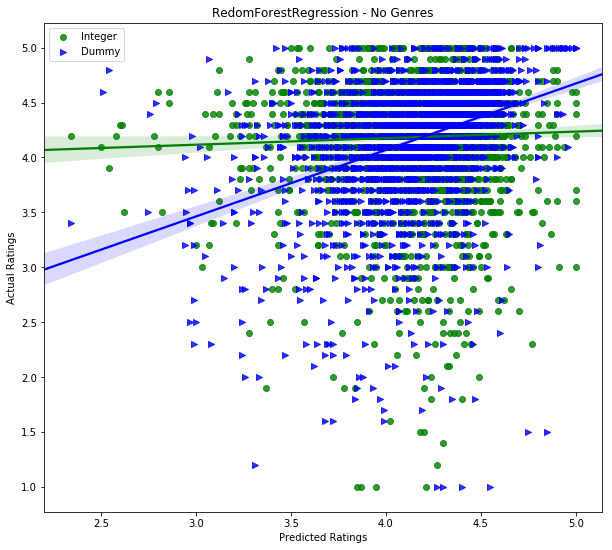

In [28]:
plt.figure(figsize=(10,9))
sns.regplot(result,y_test,color='green', label = 'Integer', marker = 'o')
sns.regplot(result1,y1_test,color='blue',label = 'Dummy', marker = '>')
plt.legend()
plt.title('RedomForestRegression - No Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

It surprised me that the it has siginificant difference in the above model. It indeed indicates that Genres palys a important role in rating App.

#### Linear model to predict Rating without Genres

In [20]:
X2 = data.drop(labels = ['Category', 'Rating', 'Genres','Genre2'],axis = 1)
Y2 = data.Rating
x_train,x_test,y_train,y_test = train_test_split(X2,Y2, test_size=0.3)
model2 = LinearRegression()
model2.fit(x_train,y_train)
result2 = model2.predict(x_test)

In [21]:
data1.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genre2,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000,10000,0,0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000,500000,0,0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000,5000000,0,0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000,50000000,0,0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000,100000,0,0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X3 = data1.drop(labels =['Category_c','Rating', 'Genres','Genre2'],axis =1)
Y3 = data1.Rating
x1_train,x1_test,y1_train,y1_test = train_test_split(X3,Y3, test_size=0.3)
model3 = LinearRegression()
model3.fit(x1_train,y1_train)
result3 = model3.predict(x1_test)

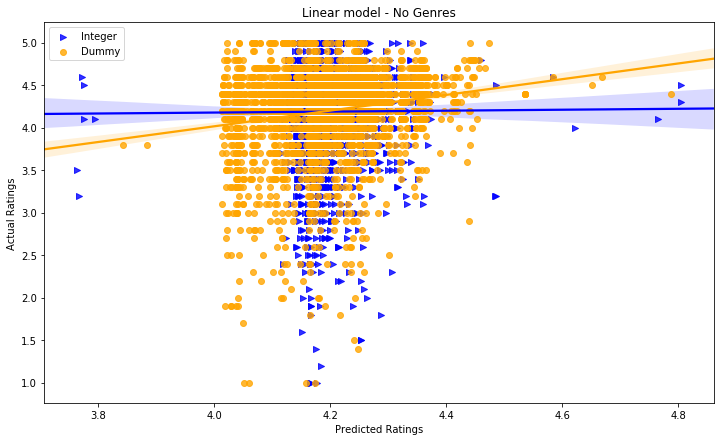

In [30]:
plt.figure(figsize=(12,7))
sns.regplot(result2,y_test,color='blue', label = 'Integer', marker = '>')
sns.regplot(result3,y1_test,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - No Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

#### Linear regression model with Genres

In [24]:
X4 = data.drop(labels = ['Category','Rating','Genres'],axis = 1)
Y4 = data.Rating
x2_train, x2_test, y2_train, y2_test = train_test_split(X4, Y4, test_size=0.30)
model4 = LinearRegression()
model4.fit(x2_train,y2_train)
results4 = model4.predict(x2_test)

In [25]:
X5 = data1.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
Y5 = data1.Rating
x_train, x_test, y_train, y_test = train_test_split(X5, Y5, test_size=0.30)
model5 = LinearRegression()
model5.fit(x_train,y_train)
result5 = model5.predict(x_test)


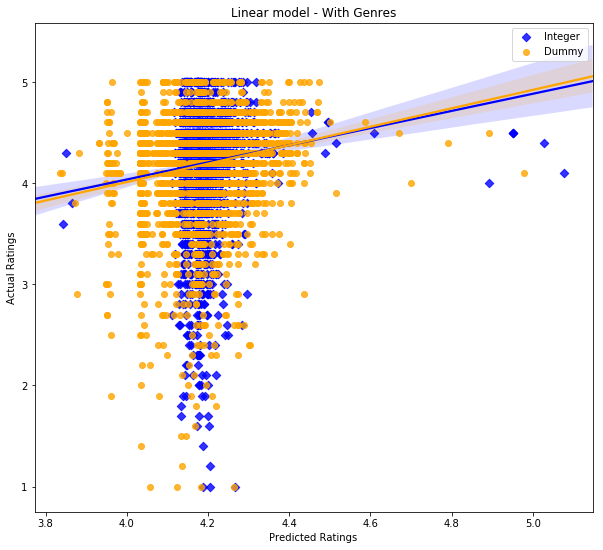

In [26]:
plt.figure(figsize=(10,9))
sns.regplot(results4,y2_test,color='blue', label = 'Integer', marker = 'D')
sns.regplot(result5,y_test,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - With Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()


By comparing these two graph with one model, I found that it verify the hopythese provided last model. in the no-Genres model, there is still a slight difference. However, adding genres column into model, I realize that they are similiar with each other.